<a href="https://colab.research.google.com/github/senertopaloglu/RSI-evaluator/blob/main/RSI_Evaluator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
# determine if stock is being over bought (to sell) or over sold (to buy).
# 14 day RSI. 70/30 80/20 90/10 90/10 has higher momentum than 70/30 

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [58]:
from google.colab import files
uploaded = files.upload()

Saving FSV_IMPROVED.csv to FSV_IMPROVED.csv


In [83]:
FB = pd.read_csv('FB.csv')
FB

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-05-23,182.500000,186.910004,182.179993,186.899994,186.899994,16628100
1,2018-05-24,185.880005,186.800003,185.029999,185.929993,185.929993,12354700
2,2018-05-25,186.020004,186.330002,184.449997,184.919998,184.919998,10965100
3,2018-05-29,184.339996,186.809998,183.710007,185.740005,185.740005,16398900
4,2018-05-30,186.539993,188.000000,185.250000,187.669998,187.669998,13736900
...,...,...,...,...,...,...,...
247,2019-05-17,184.839996,187.580002,184.279999,185.300003,185.300003,10485400
248,2019-05-20,181.880005,184.229996,181.369995,182.720001,182.720001,10352000
249,2019-05-21,184.570007,185.699997,183.889999,184.820007,184.820007,7502800
250,2019-05-22,184.729996,186.740005,183.610001,185.320007,185.320007,9203300


In [84]:
# set date as index for dataset
FB = FB.set_index(pd.DatetimeIndex(FB['Date'].values))
FB

,Date,Open,High,Low,Close,Adj Close,Volume
2018-05-23,2018-05-23,182.500000,186.910004,182.179993,186.899994,186.899994,16628100
2018-05-24,2018-05-24,185.880005,186.800003,185.029999,185.929993,185.929993,12354700
2018-05-25,2018-05-25,186.020004,186.330002,184.449997,184.919998,184.919998,10965100
2018-05-29,2018-05-29,184.339996,186.809998,183.710007,185.740005,185.740005,16398900
2018-05-30,2018-05-30,186.539993,188.000000,185.250000,187.669998,187.669998,13736900
...,...,...,...,...,...,...,...
2019-05-17,2019-05-17,184.839996,187.580002,184.279999,185.300003,185.300003,10485400
2019-05-20,2019-05-20,181.880005,184.229996,181.369995,182.720001,182.720001,10352000
2019-05-21,2019-05-21,184.570007,185.699997,183.889999,184.820007,184.820007,7502800
2019-05-22,2019-05-22,184.729996,186.740005,183.610001,185.320007,185.320007,9203300


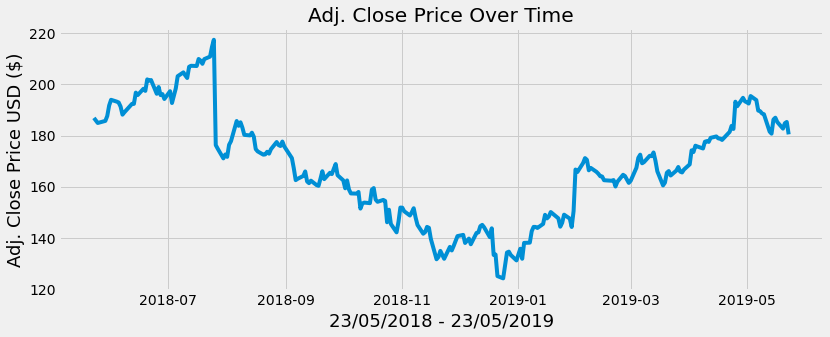

In [85]:
plt.figure(figsize=(12.2,4.5))
plt.plot(FB.index, FB['Adj Close'], label='Adj Close Price')
plt.title('Adj. Close Price Over Time')
plt.xlabel('23/05/2018 - 23/05/2019', fontsize=18)
plt.ylabel('Adj. Close Price USD ($)', fontsize=18)
plt.show()

In [86]:
# data preparation

# calc price difference
delta = FB['Adj Close'].diff(1) # from previous day
delta

2018-05-23         NaN
2018-05-24   -0.970001
2018-05-25   -1.009995
2018-05-29    0.820007
2018-05-30    1.929993
                ...   
2019-05-17   -1.690002
2019-05-20   -2.580002
2019-05-21    2.100006
2019-05-22    0.500000
2019-05-23   -4.860000
Name: Adj Close, Length: 252, dtype: float64

In [87]:
# remove first entry since delta is NaN
delta = delta.dropna()
delta

2018-05-24   -0.970001
2018-05-25   -1.009995
2018-05-29    0.820007
2018-05-30    1.929993
2018-05-31    4.110001
                ...   
2019-05-17   -1.690002
2019-05-20   -2.580002
2019-05-21    2.100006
2019-05-22    0.500000
2019-05-23   -4.860000
Name: Adj Close, Length: 251, dtype: float64

In [88]:
# get + gains (up)
# get - gains (down)

up = delta.copy()
down = delta.copy()

up[up < 0] = 0
down[down > 0] = 0 

In [89]:
period = 14
# calc avg gain and avg loss
avg_gain = up.rolling(window=period).mean()
avg_loss = down.rolling(window=period).mean()

In [90]:
# calc RS (pre-req for RSI)
RS = avg_gain / avg_loss

# calc RSI
RSI = 100.0 - (100.0 / (1.0 + RS))

In [91]:
RSI

2018-05-24           NaN
2018-05-25           NaN
2018-05-29           NaN
2018-05-30           NaN
2018-05-31           NaN
                 ...    
2019-05-17    -97.046570
2019-05-20    -86.142482
2019-05-21   -137.637369
2019-05-22   -163.661999
2019-05-23    -59.027439
Name: Adj Close, Length: 251, dtype: float64

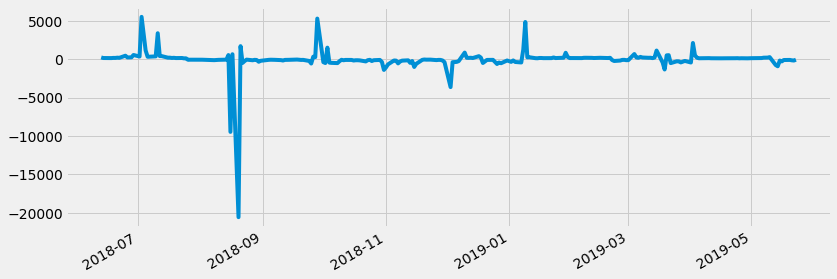

In [92]:
# visualise RSI
plt.figure(figsize=(12.2,4.5))
RSI.plot()
plt.show()

In [93]:
# analyse good times to buy/sell stock

new_df = pd.DataFrame()
new_df['Adj Close'] = FB['Adj Close']
new_df['RSI'] = RSI

new_df

,Adj Close,RSI
2018-05-23,186.899994,NaN
2018-05-24,185.929993,NaN
2018-05-25,184.919998,NaN
2018-05-29,185.740005,NaN
2018-05-30,187.669998,NaN
...,...,...
2019-05-17,185.300003,-97.046570
2019-05-20,182.720001,-86.142482
2019-05-21,184.820007,-137.637369
2019-05-22,185.320007,-163.661999


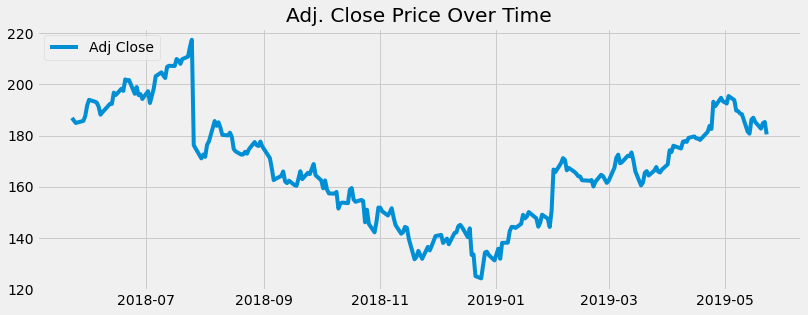

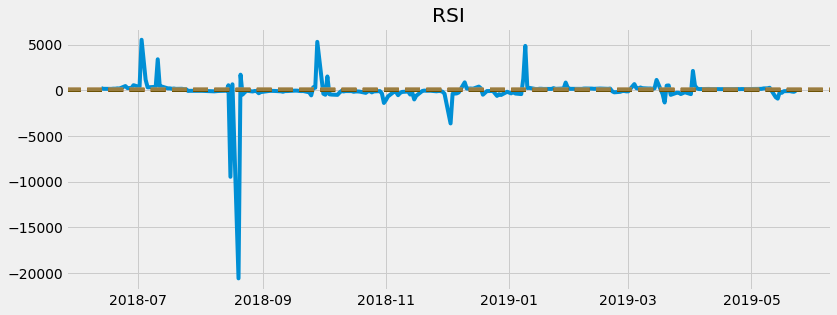

In [95]:
# visualise adjusted close price and RSI

# plot adj. close
plt.figure(figsize=(12.2,4.5))
plt.plot(new_df.index, new_df['Adj Close'])
plt.title('Adj. Close Price Over Time')
plt.legend(new_df.columns.values, loc = 'upper left')
plt.show()

# plot RSI
plt.figure(figsize=(12.2,4.5))
plt.title('RSI')
plt.plot(new_df.index, new_df['RSI'])
plt.axhline(0, linestyle='--', alpha=0.5, color='gray')
plt.axhline(10, linestyle='--', alpha=0.5, color='orange')
plt.axhline(20, linestyle='--', alpha=0.5, color='green')
plt.axhline(30, linestyle='--', alpha=0.5, color='red')
plt.axhline(70, linestyle='--', alpha=0.5, color='red')
plt.axhline(80, linestyle='--', alpha=0.5, color='green')
plt.axhline(90, linestyle='--', alpha=0.5, color='orange')
plt.axhline(100, linestyle='--', alpha=0.5, color='gray')
plt.show()